# IA-306 
## TP 1 (part A) 2018/12/06
## Coding Multi-Layer Perceptron in python (for a binary classification problem)

For any remark or suggestion, please feel free to contact me at:
geoffroy.peeters@telecom-paristech.fr

Last edit: 2018/02/05 geoffroy.peeters@telecom-paristech.fr

### Objective:
We want to implement a two layers MLP (1 hidden layer) in Python.

#### Forward propagation

- $Z^{[1]} = W^{[1]} X + b^{[1]}$
- $A^{[1]} = g^{[1]}(Z^{[1]})$
- $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$
- $A^{[2]} = g^{[2]}(Z^{[2]})$

where 
- $g^{[1]}$ is a ```Relu``` function (the code is provided)
- $g^{[2]}$ is a ```sigmoid``` function (the code is provided)

#### Compute the cost 

The cost is computed as the average of the the loss over the training data. Since we deal with a binary classification problem, we will use the binary cross-entropy.

#### Backward propagation

Based on the slides of the lecture, write the corresponding backward propagation algorithm.

#### Parameters update

Implement a **first version** in which the parameters are updated using a simple gradient descent:
- $W = W - \alpha dW$


Implement a **second version** in which the parameters are updated using the momentum method
- $VdW(t) = \beta VdW(t-1) + (1-\beta) dW$
- $W) = W + \alpha VdW(t)$

We therefore need to implement the


### Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

### Note 

The code of the Multi-Layer-Perceptron is written as a python class. This allows to pass all the variables easely from one function/method to the other.

To use a given variable, you need to use ```self.$VARIABLE_NAME```, such as````self.W1````,```self.b1```, ... (see the code already written).

### Testing

For testing your code, you can use the code provided in the last cells (loop over epochs and display of the loss decrease).
You should a cost which decreases (largely) over epochs.

# 1. Load packages

In [49]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt 
import pandas as pd

# 2. Define a set of functions

In [50]:
def F_standardize(X):
    """
    standardize X, i.e. subtract mean (over data) and divide by standard-deviation (over data)
    
    Parameters
    ----------
    X: np.array of size (nbData, nbDim)
        matrix containing the observation data
    
    Returns
    -------
    X: np.array of size (nbData, nbDim)
        standardize version of X
    """
    
    X -= np.mean(X, axis=0, keepdims=True) 
    X /= (np.std(X, axis=0, keepdims=True) + 1e-16)
    return X

In [51]:
def F_sigmoid(x):
    """Compute the value of the sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def F_relu(x):
    """Compute the value of the Rectified Linear Unit activation function"""
    return x * (x > 0)

def F_dRelu(x):
    """Compute the derivative of the Rectified Linear Unit activation function"""
    x[x<=0] = 0
    x[x>0] = 1
    return x

def F_computeCost(hat_y, y):
    """Compute the cost (sum of the losses)
    
    Parameters
    ----------
    hat_y: (1, nbData)
        predicted value by the MLP
    y: (1, nbData)
        ground-truth class to predict
    """
    m = y.shape[1]
     
    # --- START CODE HERE
    #loss =  binary cross-entropy
    
    loss = - y * np.log(hat_y) - (1-y) * np.log(1-hat_y)

    # --- END CODE HERE
    
    cost = np.sum(loss) / m
    return cost

def F_computeAccuracy(hat_y, y):
    """Compute the accuracy
    
    Parameters
    ----------
    hat_y: (1, nbData)
        predicted value by the MLP
    y: (1, nbData)
        ground-truth class to predict
    """
    
    m = y.shape[1]    
    class_y = np.copy(hat_y)
    class_y[class_y>=0.5]=1
    class_y[class_y<0.5]=0
    
    return np.sum(class_y==y) / m

# 3. Load dataset and pre-process it

In [52]:
X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(set(y))

# X is (nbExamples, nbDim)
# y is (nbExamples,)

# --- Standardize data
X = F_standardize(X)

# --- Split between training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# --- Convert to proper shape: (nbExamples, nbDim) -> (nbDim, nbExamples)
X_train = X_train.T
X_test = X_test.T

# --- Convert to proper shape: (nbExamples,) -> (1, nbExamples)
y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

# --- Convert to oneHotEncoding: (1, nbExamples) -> (nbClass, nbExamples)
n_in = X_train.shape[0]
n_out = 1

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("n_in: {} n_out: {}".format(n_in, n_out))

X.shape: (1000, 2)
y.shape: (1000,)
{0, 1}
X_train.shape: (2, 800)
X_test.shape: (2, 200)
y_train.shape: (1, 800)
y_test.shape: (1, 200)
y_train.shape: (1, 800)
y_test.shape: (1, 200)
n_in: 2 n_out: 1


# 4. Define the MLP class with forward, backward and update methods

In [77]:
class C_MultiLayerPerceptron:
    """
    A class used to represent a Multi-Layer Perceptron with 1 hidden layers

    ...

    Attributes
    ----------
    W1, b1, W2, b2:
        weights and biases to be learnt
    Z1, A1, Z2, A2:
        values of the internal neurons to be used for backpropagation
    dW1, db1, dW2, db2, dZ1, dZ2:
        partial derivatives of the loss w.r.t. parameters
    VdW1, Vdb1, VdW2, Vdb2:
        momentum terms
    do_bin0_multi1:
        set wether we solve a binary or a multi-class classification problem
        
    Methods
    -------
    forward_propagation
    
    backward_propagation
    
    update_parameters
    
    """

    W1, b1, W2, b2 = [], [], [], []
    Z1, A1, Z2, A2 = [], [], [], []
    dW1, db1, dW2, db2 = [], [], [], []   
    dZ1, dA1, dZ2 = [], [], []
    #X, y = [], []
    # --- for momentum
    VdW1, Vdb1, VdW2, Vdb2 = [], [], [], []     
    
    def __init__(self, n_in, n_h, n_out):

        self.W1 = np.random.randn(n_h, n_in) * 0.01
        self.b1 = np.zeros(shape=(n_h, 1))
        self.W2 = np.random.randn(n_out, n_h) * 0.01
        self.b2 = np.zeros(shape=(n_out, 1))        
        
        # --- for momentum
        self.VdW1 = np.zeros(shape=(n_h, n_in)) 
        self.Vdb1 = np.zeros(shape=(n_h, 1))
        self.VdW2 = np.zeros(shape=(n_out, n_h))
        self.Vdb2 = np.zeros(shape=(n_out, 1))
        
        return

    
    def __setattr__(self, attrName, val):
        if hasattr(self, attrName):
            self.__dict__[attrName] = val
        else:
            raise Exception("self.%s note part of the fields" % attrName)

            

    def M_forwardPropagation(self, X):
        """Forward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data

        Return
        ------
        hat_y: numpy array (1, nbData)
            predicted value by the MLP
        """
        
        # --- START CODE HERE
        
        self.Z1 = np.dot(self.W1, X) + self.b1 #[:X.shape[1]]
        self.A1 = F_relu(self.Z1)
        
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = F_sigmoid(self.Z2)
        
        # --- END CODE HERE
        
        hat_y = self.A2
        
        return hat_y


    def M_backwardPropagation(self, X, y):
        """Backward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data
        y: numpy array (1, nbData)
            ground-truth class to predict
            
        """
        
        m = y.shape[1]
        
        # --- START CODE HERE        
        #self.dZ2 = ...
        #self.dW2 = ...
        #self.db2 = ...
        #self.dA1 = ...
        #self.dZ1 = ...
        #self.dW1 = ...
        #self.db1 = ...      
        
        self.dZ2 = self.A2 - y
        
        self.dW2 = (1/m) * np.dot(self.dZ2, self.A1.T)
        self.db2 = (1/m) * np.sum(self.dZ2, axis=1, keepdims=True)
        
        self.dA1 = np.multiply(np.dot(self.W2.T, self.dZ2), 1-np.power(self.A1, 2))
        #self.dA1 = np.dot(self.dW2.T, self.dZ2)

        self.dZ1 = np.multiply(np.dot(self.W2.T, self.dZ2), 1-np.power(self.A1, 2))
        #self.A1 * F_sigmoid(self.Z1)
        self.dW1 = (1/m) * np.dot(self.dZ1, X.T)
        self.db1 = (1/m) * np.sum(self.dZ1, axis=1, keepdims=True)
        
        # --- END CODE HERE
        
        return self.dW1,self.db1, self.dW2, self.db2

    
    def M_gradientDescent(self, alpha):
        """Update the parameters of the network using gradient descent

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent
            
        """

        # --- START CODE HERE
        #self.W1 = ...
        #self.b1 = ...
        #self.W2 = ...
        #self.b2 = ...
        
        self.W1 = self.W1 - alpha * self.dW1
        self.b1 = self.b1 - alpha * self.db1
        self.W2 = self.W2 - alpha * self.dW2
        self.b2 = self.b2 - alpha * self.db2
        
        # --- END CODE HERE
        
        return self.W1, self.b1, self.W2, self.b2
    
    
    def M_momentum(self, alpha, beta):
        """Update the parameters of the network using momentum method

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent
        beta: float scalar
            momentum term 
        """
        
        # --- START CODE HERE
        #self.VdW1 = ...
        #self.W1 = ...

        #self.Vdb1 = ...
        #self.b1 = ...
        
        #self.VdW2 = ...
        #self.W2 = ...
        
        #self.Vdb2 = ...
        #self.b2 = ...
        
        self.VdW1 = beta * self.VdW1 + (1-beta) * self.dW1
        self.W1 = self.W1 - alpha * self.VdW1

        self.Vdb1 = beta * self.Vdb1 + (1-beta) * self.db1
        self.b1 = self.b1 - alpha * self.Vdb1
        
        self.VdW2 = beta * self.VdW2 + (1-beta) * self.dW2
        self.W2 = self.W2 - alpha * self.VdW2
        
        self.Vdb2 = beta * self.Vdb2 + (1-beta) * self.db2
        self.b2 = self.b2 - alpha * self.Vdb2
        
        # --- END CODE HERE
                
        return self.W1, self.b1, self.W2, self.b2

# 5. Perform training using batch-gradiant and epochs

In [78]:
# Instantiate the class MLP with providing 
# the size of the various layers (input=4, hidden=10, outout=1) 

n_hidden = 10
num_epoch = 5000


myMLP = C_MultiLayerPerceptron(n_in, n_hidden, n_out)

train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

j=0
# Run over epochs
for i in range(0, num_epoch):
    print(j)
    j=j+1
    
    # --- Forward
    hat_y_train = myMLP.M_forwardPropagation(X_train)
    
    # --- Store results on train
    train_cost.append( F_computeCost(hat_y_train, y_train) )
    train_accuracy.append( F_computeAccuracy(hat_y_train, y_train) )
    
    # --- Backward
    myMLP.M_backwardPropagation(X_train, y_train)
    
    # --- Update
    myMLP.M_gradientDescent(alpha=0.1)
    #myMLP.M_momentum(alpha=0.1, beta=0.9)

    # --- Store results on test
    hat_y_test = myMLP.M_forwardPropagation(X_test)
    test_cost.append( F_computeCost(hat_y_test, y_test) )    
    test_accuracy.append( F_computeAccuracy(hat_y_test, y_test) )
    
    if (i % 500)==0: 
        print("epoch: {0:d} (cost: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(i, train_cost[-1], test_cost[-1], train_accuracy[-1], test_accuracy[-1]))

0
epoch: 0 (cost: train 0.69 test 0.69) (accuracy: train 0.51 test 0.43)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259

1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
epoch: 2000 (cost: train 0.68 test 0.69) (accuracy: train 0.66 test 0.58)
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2

3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753


## Display train/test loss and accuracy

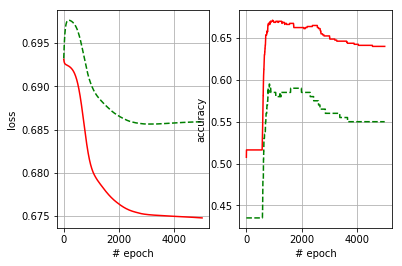

In [79]:
plt.subplot(1,2,1)
plt.plot(train_cost, 'r')
plt.plot(test_cost, 'g--')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r')
plt.plot(test_accuracy, 'g--')
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)